In [ ]:
import matplotlib as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!unzip /content/Real-Time-Emotion-Recognition-Based-Music-Player-master.zip

Streaming output truncated to the last 5000 lines.
 extracting: Real-Time-Emotion-Recognition-Based-Music-Player-master/Tensorflow/data/train/sad/im3747.png  
 extracting: Real-Time-Emotion-Recognition-Based-Music-Player-master/Tensorflow/data/train/sad/im3748.png  
 extracting: Real-Time-Emotion-Recognition-Based-Music-Player-master/Tensorflow/data/train/sad/im3749.png  
 extracting: Real-Time-Emotion-Recognition-Based-Music-Player-master/Tensorflow/data/train/sad/im375.png  
 extracting: Real-Time-Emotion-Recognition-Based-Music-Player-master/Tensorflow/data/train/sad/im3750.png  
 extracting: Real-Time-Emotion-Recognition-Based-Music-Player-master/Tensorflow/data/train/sad/im3751.png  
 extracting: Real-Time-Emotion-Recognition-Based-Music-Player-master/Tensorflow/data/train/sad/im3752.png  
 extracting: Real-Time-Emotion-Recognition-Based-Music-Player-master/Tensorflow/data/train/sad/im3753.png  
 extracting: Real-Time-Emotion-Recognition-Based-Music-Player-master/Tensorflow/data/t

In [ ]:
train_dir = '/content/Real-Time-Emotion-Recognition-Based-Music-Player-master/Tensorflow/data/train'
val_dir = '/content/Real-Time-Emotion-Recognition-Based-Music-Player-master/Tensorflow/data/test'

num_train = 28709
num_val = 7178
batch_size = 64
num_epoch = 80

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.


In [ ]:
validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')


Found 7178 images belonging to 7 classes.


In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0001, decay=1e-6),metrics=['accuracy'])



In [ ]:
model_info = model.fit(
    train_generator,
    steps_per_epoch=num_train,
    epochs=num_epoch,
    validation_data=validation_generator,
    validation_steps=num_val
)


Epoch 1/80


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  449/28709 ━━━━━━━━━━━━━━━━━━━━ 16:18 35ms/step - accuracy: 0.2415 - loss: 1.8296

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


28709/28709 ━━━━━━━━━━━━━━━━━━━━ 28s 679us/step - accuracy: 0.2606 - loss: 1.7972 - val_accuracy: 0.3383 - val_loss: 1.7057
Epoch 2/80
28709/28709 ━━━━━━━━━━━━━━━━━━━━ 31s 575us/step - accuracy: 0.3701 - loss: 1.6207 - val_accuracy: 0.4092 - val_loss: 1.5411
Epoch 3/80
28709/28709 ━━━━━━━━━━━━━━━━━━━━ 14s 479us/step - accuracy: 0.4145 - loss: 1.5233 - val_accuracy: 0.4459 - val_loss: 1.4519
Epoch 4/80
28709/28709 ━━━━━━━━━━━━━━━━━━━━ 21s 490us/step - accuracy: 0.4464 - loss: 1.4478 - val_accuracy: 0.4648 - val_loss: 1.3961
Epoch 5/80
28709/28709 ━━━━━━━━━━━━━━━━━━━━ 21s 496us/step - accuracy: 0.4715 - loss: 1.3888 - val_accuracy: 0.4870 - val_loss: 1.3401
Epoch 6/80
28709/28709 ━━━━━━━━━━━━━━━━━━━━ 20s 478us/step - accuracy: 0.4923 - loss: 1.3341 - val_accuracy: 0.5067 - val_loss: 1.3106
Epoch 7/80
28709/28709 ━━━━━━━━━━━━━━━━━━━━ 14s 480us/step - accuracy: 0.5140 - loss: 1.2919 - val_accuracy: 0.5180 - val_loss: 1.2743
Epoch 8/80
28709/28709 ━━━━━━━━━━━━━━━━━━━━ 14s 490us/step - accur

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
history = model_info.history
epochs = range(1, len(history['accuracy']) + 1)

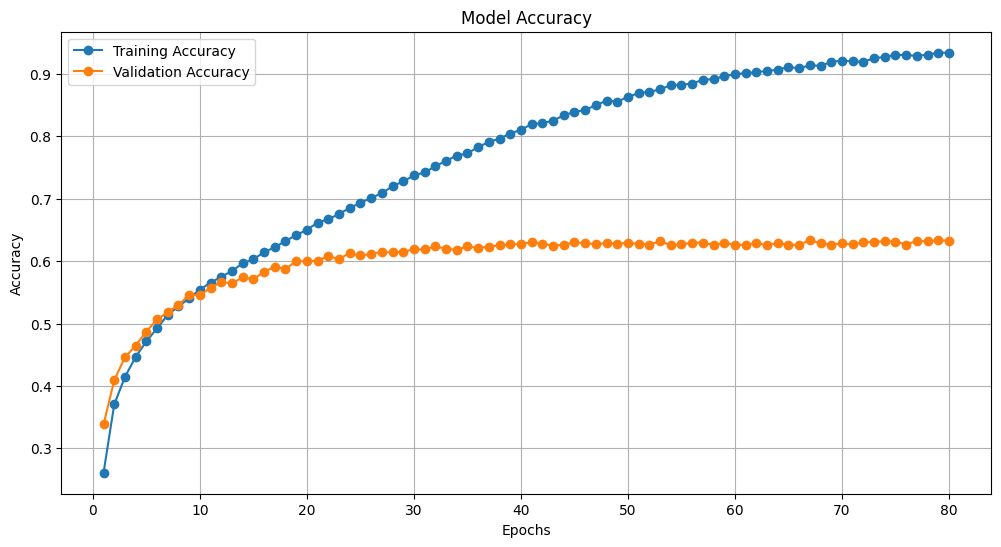

In [ ]:
# Plot Training and Validation Accuracy
plt.figure(figsize=(12, 6))
plt.plot(epochs, history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(epochs, history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

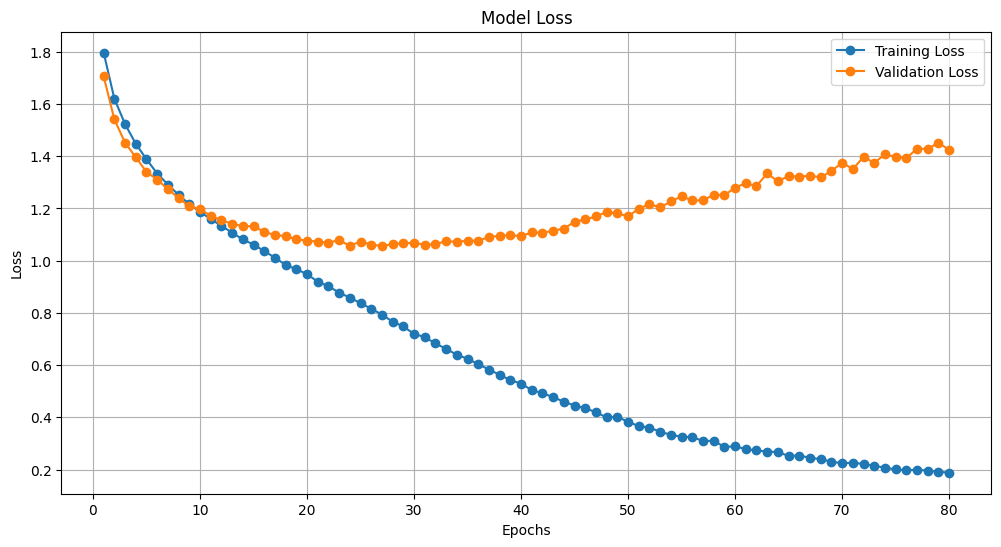

In [ ]:
# Plot Training and Validation Loss
plt.figure(figsize=(12, 6))
plt.plot(epochs, history['loss'], label='Training Loss', marker='o')
plt.plot(epochs, history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [ ]:
model.save_weights('model.weights.h5')
print(model.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 44, 44, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 20, 20, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 7)                   │           7,175 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,036,823 (26.84 MB)

 Trainable params: 2,345,607 (8.95 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,691,216 (17.90 MB)

None


In [ ]:
model.save('content/model.h5')

In [ ]:
import numpy as np
import cv2
from keras.models import load_model

# Load the pre-trained model
model = load_model('/content/content/model.h5')

# Function to preprocess the image
def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read the image in grayscale
    image = cv2.resize(image, (48, 48))  # Resize to the input size of the model (48x48)
    image = np.expand_dims(image, axis=-1)  # Add channel dimension
    image = image.astype('float32') / 255.0  # Normalize the image
    return np.expand_dims(image, axis=0)  # Add batch dimension

# Example image path
image_path = '/content/Real-Time-Emotion-Recognition-Based-Music-Player-master/Tensorflow/data/train/fearful/im1006.png'

# Preprocess the image
processed_image = preprocess_image(image_path)

# Predict the emotion
prediction = model.predict(processed_image)
emotion_index = np.argmax(prediction)
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
predicted_emotion = emotions[emotion_index]

print(f'Predicted Emotion: {predicted_emotion}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
Predicted Emotion: Fear
